<a href="https://colab.research.google.com/github/denver-edwards/online-retail-customer/blob/main/Online_Retail_Customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Online Retail Customer Churn

**Author:** Denver Edwards

## Introduction and Objective
 The goal of this project is to develop a predictive model to identify customers at high risk of churning from an online retail platform. By accurately predicting potential churn, the business aims to implement targeted retention strategies to improve customer loyalty, reduce churn rates, and increase profitability.

In [1]:
from google.colab import files
files.upload()

!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d hassaneskikri/online-retail-customer-churn-dataset

import zipfile
zip_ref = zipfile.ZipFile('online-retail-customer-churn-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

Saving kaggle.json to kaggle.json
rm: cannot remove '/root/.kaggle': No such file or directory
  0% 0.00/23.2k [00:00<?, ?B/s]
100% 23.2k/23.2k [00:00<00:00, 49.9MB/s]


In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

## Data Collection
[Code and description for loading the dataset and initial data exploration]


In [3]:
# Code to load data
df = pd.read_csv("online_retail_customer_churn.csv")

# Initial exploration
print(df.info())
print(df.head())

# over_65 = len(df[df["Age"] > 65])
# print(over_65)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_ID                 1000 non-null   int64  
 1   Age                         1000 non-null   int64  
 2   Gender                      1000 non-null   object 
 3   Annual_Income               1000 non-null   float64
 4   Total_Spend                 1000 non-null   float64
 5   Years_as_Customer           1000 non-null   int64  
 6   Num_of_Purchases            1000 non-null   int64  
 7   Average_Transaction_Amount  1000 non-null   float64
 8   Num_of_Returns              1000 non-null   int64  
 9   Num_of_Support_Contacts     1000 non-null   int64  
 10  Satisfaction_Score          1000 non-null   int64  
 11  Last_Purchase_Days_Ago      1000 non-null   int64  
 12  Email_Opt_In                1000 non-null   bool   
 13  Promotion_Response          1000 n

## Data Cleaning and Preprocessing
[Description of data cleaning and preprocessing steps]


In [4]:
# Data cleaning and preprocessing steps
print("There are", df.isnull().sum().sum(), "missing values.")

There are 0 missing values.


## Exploratory Data Analysis (EDA)
[Description and code for statistical summary and data visualization]


In [5]:
# EDA code
df.describe()

,Customer_ID,Age,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,43.267000,111.962960,5080.79265,9.727000,49.456000,266.876530,4.612000,1.934000,2.974000,182.890000
std,288.819436,15.242311,52.844111,2862.12335,5.536346,28.543595,145.873445,2.896869,1.402716,1.391855,104.391319
min,1.000000,18.000000,20.010000,108.94000,1.000000,1.000000,10.460000,0.000000,0.000000,1.000000,1.000000
25%,250.750000,30.000000,67.800000,2678.67500,5.000000,25.000000,139.682500,2.000000,1.000000,2.000000,93.000000
50%,500.500000,43.000000,114.140000,4986.19500,9.000000,49.000000,270.100000,5.000000,2.000000,3.000000,180.500000
75%,750.250000,56.000000,158.452500,7606.47000,14.000000,74.000000,401.602500,7.000000,3.000000,4.000000,274.000000
max,1000.000000,69.000000,199.730000,9999.64000,19.000000,99.000000,499.570000,9.000000,4.000000,5.000000,364.000000


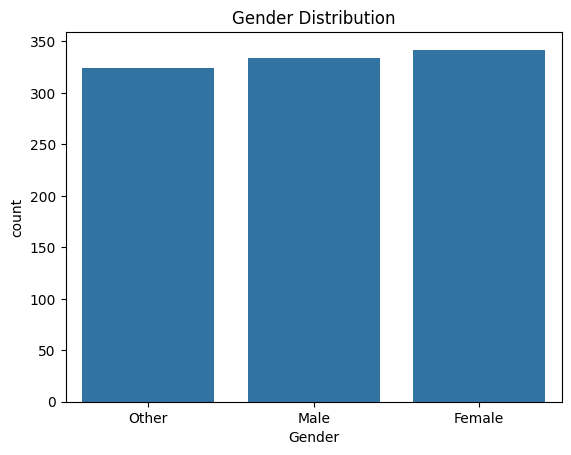

In [6]:
# Gender Distribution
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

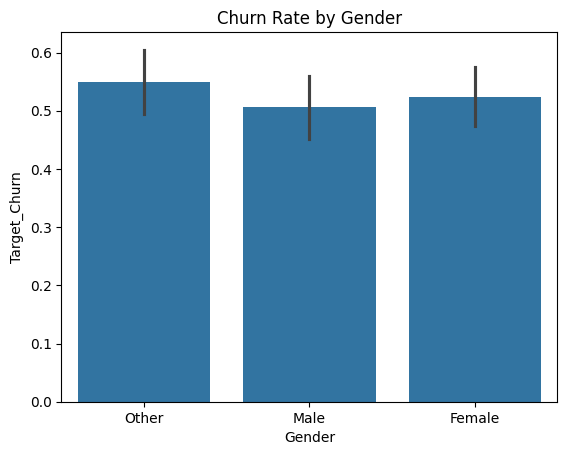

In [7]:
# Churn Rate by Gender
sns.barplot(x='Gender', y='Target_Churn', data=df)
plt.title('Churn Rate by Gender')
plt.show()

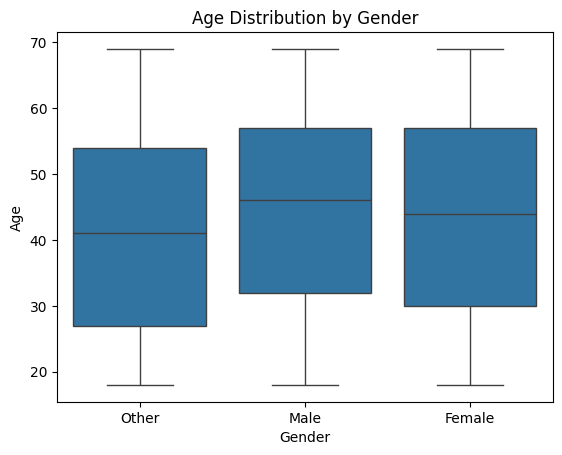

In [8]:
# Age Distribution by Gender
sns.boxplot(x='Gender', y='Age', data=df)
plt.title('Age Distribution by Gender')
plt.show()

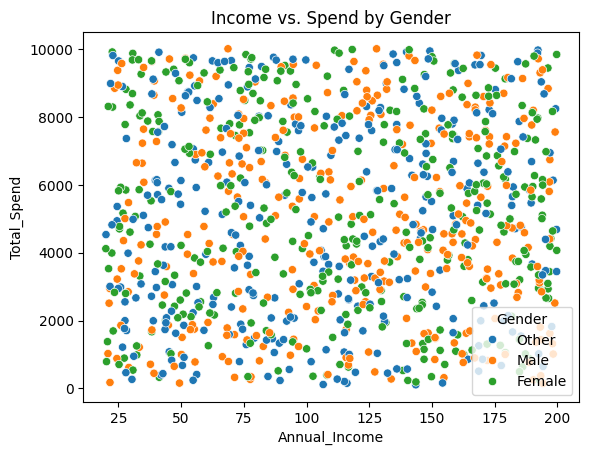

In [9]:
# Annual Income vs. Total Spend by Gender
sns.scatterplot(x='Annual_Income', y='Total_Spend', hue='Gender', data=df)
plt.title('Income vs. Spend by Gender')
plt.show()

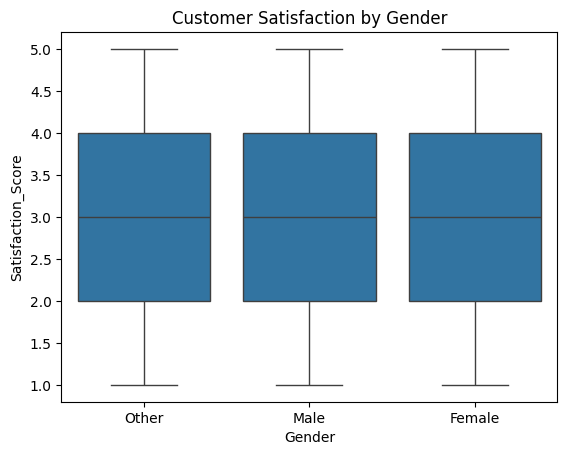

In [10]:
# Satisfaction Score by Gender
sns.boxplot(x='Gender', y='Satisfaction_Score', data=df)
plt.title('Customer Satisfaction by Gender')
plt.show()

## Feature Engineering and Selection
[Description of feature engineering and selection process]


In [110]:
# Feature engineering and selection code
le_gender = LabelEncoder()
le_promotion_response = LabelEncoder()

df["Gender"] = le_gender.fit_transform(df["Gender"])
df["Promotion_Response"] = le_promotion_response.fit_transform(df["Promotion_Response"])
df["Total_Spend_in_Thous"] = df["Total_Spend"] / 1000

df["Return_Rate"] = df["Num_of_Returns"] / df["Num_of_Purchases"]
df["Avg_Spend_per_Purchase"] = df["Total_Spend"] / df["Num_of_Purchases"]
df["Purchase_Frequency"] = df["Num_of_Purchases"] / df["Years_as_Customer"]
df["Spend_to_Income_Ratio"] = df["Total_Spend_in_Thous"] / df["Annual_Income"]
# df["Recent_90_days"] = (df["Last_Purchase_Days_Ago"] < 180).astype("int")

In [ ]:
print(df)

In [97]:
print(df["Recent_90_days"].describe())

count    1000.000000
mean        0.236000
std         0.424835
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Recent_30_days, dtype: float64


## Model Building
[Description of model building process including splitting dataset and training models]


In [105]:
# Model training code
features = ["Return_Rate", "Purchase_Frequency", "Spend_to_Income_Ratio",
            "Avg_Spend_per_Purchase"]
X = df[features]
y = df['Target_Churn']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [5, 10, 20, 25, 30, 35],
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [5, 10, 20, 25, 30, 35]},
             scoring='accuracy', verbose=2)

## Model Evaluation
[Description of the model evaluation process and metrics]

Promotion Response & Gender has little effect

In [106]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best cross-validation score (accuracy):", best_score)

Best parameters: {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best cross-validation score (accuracy): 0.555


In [107]:
best_model = grid_search.best_estimator_

In [109]:
y_pred = best_model.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Test Precision: {precision_score(y_test, y_pred)}")
print(f"Test Recall: {recall_score(y_test, y_pred)}")
print(f"Test F1 Score: {f1_score(y_test, y_pred)}")

Test Accuracy: 0.515
Test Precision: 0.5338345864661654
Test Recall: 0.6698113207547169
Test F1 Score: 0.5941422594142259


In [108]:
importances = best_model.feature_importances_
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(features, importances)]
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

for pair in feature_importances:
    print(f'Feature: {pair[0]}, Importance: {pair[1]}')

Feature: Avg_Spend_per_Purchase, Importance: 0.2879
Feature: Purchase_Frequency, Importance: 0.2662
Feature: Spend_to_Income_Ratio, Importance: 0.2623
Feature: Return_Rate, Importance: 0.1547
Feature: Recent_90_days, Importance: 0.0289


## Conclusion and Next Steps
[Summary of findings, conclusions, and recommendations for future work]


## References
[References or data sources used in the project]
